# Sample Code

by: Aaron Abrogena

made on Asus G55VW, i7-3630QM, 8 gb ram, Geforce GTX 660M

In [1]:
#import the necessary packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Part A: Read and parse the data

In [2]:
#Read the CSV and see what the data looks like
df = pd.read_csv('C:/Users/aaron/Downloads/res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu.csv')
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [3]:
#How many rows and columns are in the data set?
df.shape

(442458, 11)

In [4]:
#What are the dtypes?
df.dtypes

Year-Month                        int64
Agency Number                     int64
Agency Name                      object
Cardholder Last Name             object
Cardholder First Initial         object
Description                      object
Amount                          float64
Vendor                           object
Transaction Date                 object
Posted Date                      object
Merchant Category Code (MCC)     object
dtype: object

The two date columns are read as `object` type and not `date`

In [5]:
#Find any rows with null values
df[df.isnull().any(axis=1)]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)


In [6]:
#How many descriptions are there?
df.Description.nunique()

88749

In [7]:
#What are the top 10 descriptions?
df.Description.value_counts(10).head(10)

GENERAL PURCHASE                 0.558668
AIR TRAVEL                       0.066863
ROOM CHARGES                     0.040953
AT&T SERVICE PAYMENT ITM         0.006005
001 Priority          1LB PCE    0.004532
000000000000000000000000         0.004131
PRODUCTS AND SERVICES EA         0.002857
SHIPPING CHARGES                 0.002735
001 Standard          1LB PCE    0.001668
JANITORIAL SUPPLIES NMB          0.001449
Name: Description, dtype: float64

56% of purchases are described as General Purchase while 10% are Travel related charges (Air Travel & Room Charges)

In [8]:
#How many Vendors are there?
df.Vendor.nunique()

86729

There are almost as many Vendors as there are Descriptions

In [9]:
#What are the top 10 vendors?
df.Vendor.value_counts(10).head(10)

STAPLES                      0.033544
AMAZON MKTPLACE PMTS         0.027566
WW GRAINGER                  0.027293
Amazon.com                   0.024332
BILL WARREN OFFICE PRODUC    0.010123
LOWES #00241                 0.009562
VWR INTERNATIONAL INC        0.008842
AT&T BILL PAYMENT            0.006925
AIRGAS CENTRAL               0.006062
AT&T DATA                    0.005926
Name: Vendor, dtype: float64

There doesn't seem to be a concentration on a single vendor like there is in Descriptions. However, we can see that Amazon and AT&T appear a couple of times in the list. It may be worthwhile to perform some clustering on the Vendor column to find major vendors. There are many ways to do this which may include reading all combinations of `Vendor` and using a map function or using python packages like `Polyglot` which can be used to cluster text however some training may still need to be done.  

In the interest of time, I elected to use `OpenRefine` which is a powerful data cleaning tool that has built in text clustering functions. More can be read here http://openrefine.org/ There are ways of integrating `OpenRefine` to a Jupyter Notebook (documented here https://github.com/OpenRefine/OpenRefine/wiki/Jupyter) but again in the interest of time, I elected to use the GUI as seen below. 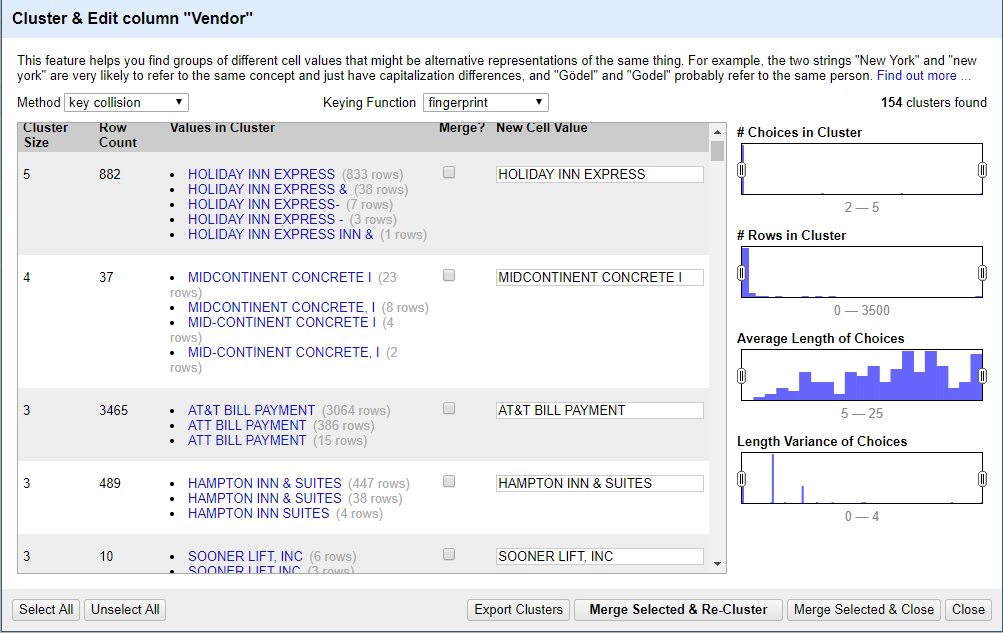

I will be using this software in order to cluster the `Description` and `Vendor` columns. 


In [10]:
#reread the fixed data and overwrite the older dataframe
#assert the dtype for the date columns
df = pd.read_csv('C:/Users/aaron/Downloads/fixed_card_data.csv',parse_dates=['Posted Date', 'Transaction Date'])
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [11]:
#Check the dtype of the new dataframe
df.dtypes

Year-Month                               int64
Agency Number                            int64
Agency Name                             object
Cardholder Last Name                    object
Cardholder First Initial                object
Description                             object
Amount                                 float64
Vendor                                  object
Transaction Date                datetime64[ns]
Posted Date                     datetime64[ns]
Merchant Category Code (MCC)            object
dtype: object

In [12]:
#How many Descriptions are there?
df.Description.nunique()

70886

There are slightly less Descriptions now

In [13]:
#What are the top 10 Descriptions?
df.Description.value_counts(10).head(10)

GENERAL PURCHASE                                      0.558668
AIR TRAVEL                                            0.066863
ROOM CHARGES                                          0.040953
00070509 ITM                                          0.012132
AT&T SERVICE PAYMENT ITM                              0.006005
001 Priority          1LB PCE                         0.005365
000000000000000000000000                              0.005015
SHIPPING-FUEL SURCHARGE EA|AMICON ULTRA-15ML 3K PK    0.003646
PRODUCTS AND SERVICES EA                              0.003408
SHIPPING CHARGES                                      0.002735
Name: Description, dtype: float64

In [14]:
#How many Vendors are there?
df.Vendor.nunique()

29276

In [15]:
df.Vendor.value_counts(10).head(10)

Amazon                       0.053610
STAPLES                      0.045469
WW GRAINGER                  0.027293
AMERICAN AI                  0.027166
WAL-MART                     0.026778
LOWES #00241                 0.023155
FEDEX                        0.018451
AGENT FEE   8900591802005    0.013924
JOURNYHSE                    0.011402
BILL WARREN OFFICE PRODUC    0.010123
Name: Vendor, dtype: float64

We can see that popular shopping brands make up the top 10 Vendors with `Amazon` taking the top spot. Purchases related to Amazon (Amazon Prime, Amazon Web Services, Amazon Kindle) take up 1 out of every 20 purchases in 2014.

# Part B: Compute and Visualize the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028871743518>]],
      dtype=object)

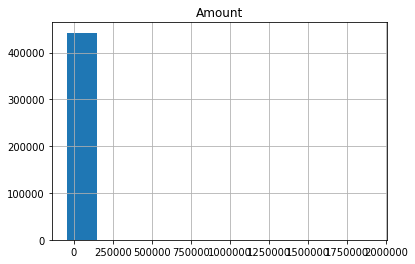

In [16]:
#Compute and Visualize the amounts as a histogram
#The simplest way to do this is to use the function df.hist()
df.hist('Amount')

C:\Users\aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


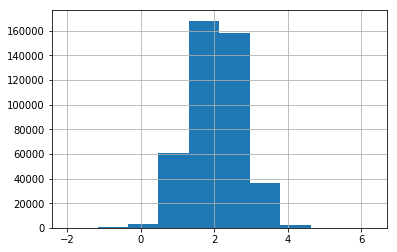

In [17]:
#However we can only see one bar with the simple method. We can apply a log function in order to see the data better
np.log10(df.Amount).hist()

Here we can see that most of the transactions have an amount between 10 ^ 1 and 10 ^ 3 dollars

C:\Users\aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


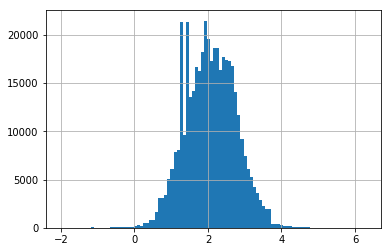

In [18]:
#Adding more bins adds more information gain
np.log10(df.Amount).hist(bins=100)

Here we can see that the amounts are almost normally distributed with some spikes at around ~10 dollars. 

# In order to create an identifier for each individual card holder, we will create a column that combines first name and last name and agency number.

Since we have only first initial and last name of the cardholder -- it would be difficult for us to manage any duplicates. We can add the agency number in order add a degree of surety but it isn't a fool proof way of creating a unique identifier.


In [19]:
df['unique identifier'] = df['Cardholder First Initial'].map(str) + df['Cardholder Last Name'].map(str) + df['Agency Number'].map(str)
df['unique identifier'].head()

0            CMason1000
1            CMason1000
2           JMassey1000
3           TMassey1000
4    MMauro-Herrera1000
Name: unique identifier, dtype: object

In [20]:
#How many unique users to we have?
df['unique identifier'].nunique()

5466

In [21]:
#To get the top 5 users by monthly spending -- simply group by unique identifier and year month and sum total their transactions
df.groupby(['unique identifier', 'Year-Month'])['Amount'].sum().sort_values(ascending=False).head(5)

unique identifier  Year-Month
eCardholder98000   201310        3492295.03
                   201404        2292435.58
                   201403        2030185.77
77700077000        201309        1903858.37
                   201308        1750379.98
Name: Amount, dtype: float64

In [22]:
#To create a custom definition quarter, we can create a column called Quarter and simply map the months to it
month_map = {'201307': 'Quarter 1',
            '201308': 'Quarter 1',
            '201309': 'Quarter 1',
            '201310': 'Quarter 2',
            '201311': 'Quarter 2',
            '201312': 'Quarter 2',
            '201401': 'Quarter 3',
            '201402': 'Quarter 3',
            '201403': 'Quarter 3',
            '201404': 'Quarter 4',
            '201405': 'Quarter 4',
            '201406': 'Quarter 4'}
df['Quarter'] = df['Year-Month'].astype(str).map(month_map)
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),unique identifier,Quarter
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,CMason1000,Quarter 1
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,CMason1000,Quarter 1
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,JMassey1000,Quarter 1
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",TMassey1000,Quarter 1
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",MMauro-Herrera1000,Quarter 1


In [23]:
#To find the most sales per Vendor per Quarter then we can use the Quarter column and Vendor column in a groupby
df.groupby(['Quarter'])['Vendor'].value_counts().to_frame().sort_values('Vendor', ascending=False).groupby('Quarter').head(5).sort_values(['Quarter', 'Vendor'], ascending=False)

C:\Users\aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'Vendor' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


Vendor
Quarter   Vendor              
Quarter 4 Amazon          6476
          STAPLES         4452
          LOWES #00241    2958
          AMERICAN AI     2830
          WW GRAINGER     2678
Quarter 3 Amazon          6237
          STAPLES         5296
          AMERICAN AI     3824
          WW GRAINGER     2918
          WAL-MART        2856
Quarter 2 STAPLES         5023
          Amazon          4895
          WAL-MART        3363
          WW GRAINGER     2913
          AMERICAN AI     2354
Quarter 1 Amazon          6112
          STAPLES         5347
          WAL-MART        3710
          WW GRAINGER     3567
          AMERICAN AI     3012

No surprises that the top 5 for every month are also the top 5 overall 

In [24]:
#To find the Top 5 Categories by Sum of Amounts we can simply use another groupby function
df.groupby('Merchant Category Code (MCC)')['Amount'].sum().sort_values(ascending=False).head(5)

Merchant Category Code (MCC)
DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP AND SUP.    11004961.34
INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED               10846920.22
COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFTWARE         10091600.76
COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED              8139120.69
MISCELLANEOUS AND SPECIALTY RETAIL STORES                   5563077.11
Name: Amount, dtype: float64

# Part C: Customer Segmentation

A popular way of doing customer segmentation with data relating to transactions is to use `RFM` or `Recency, Frequency, and Montetary`. More info can be found here. https://clevertap.com/blog/rfm-analysis/ To create an analysis, we will create a new dataframe wherein each row is a single user.

In [25]:
#Part 1 -- create a dataframe wherein one row is one user and one column is the amount that user has spent
sum_df = df.groupby('unique identifier')['Amount'].sum().reset_index()
sum_df.columns = ['unique identifier', 'sum(Amount)']
sum_df.head()

,unique identifier,sum(Amount)
0,11500015000,4626.46
1,22410024100,2784.09
2,44200042000,2143.97
3,44460044600,111.99
4,44800048000,1258.07


In [26]:
#Part 2 -- create a dataframe wherein one row is one user and one column is the number of transactions
cnt_df = df.groupby('unique identifier')['Amount'].count().reset_index()
cnt_df.columns = ['unique identifier', 'count(Transactions)']
cnt_df.head()

,unique identifier,count(Transactions)
0,11500015000,1
1,22410024100,10
2,44200042000,16
3,44460044600,1
4,44800048000,13


In [27]:
#Part 3 -- create a dataframe wherein one row is one user and one column is the date of last transaction
# We will create another column which is the difference in days from an arbitrary date '20140701' as the last date of transaction is '20140630'
last_df = df.groupby('unique identifier')['Transaction Date'].last().reset_index()
last_df.columns = ['unique identifier', 'last_Transactions']
last_df['days since last transaction'] = (pd.to_datetime('2014-07-01') - pd.to_datetime(last_df['last_Transactions'])).dt.days
last_df.head()

,unique identifier,last_Transactions,days since last transaction
0,11500015000,2014-03-10,113
1,22410024100,2014-03-14,109
2,44200042000,2014-06-04,27
3,44460044600,2013-07-08,358
4,44800048000,2014-06-30,1


In [28]:
#Combine the 3 dataframes 
user_df = sum_df.merge(cnt_df, left_on='unique identifier', right_on='unique identifier')
user_df = user_df.merge(last_df, left_on='unique identifier', right_on='unique identifier')
user_df.head()

,unique identifier,sum(Amount),count(Transactions),last_Transactions,days since last transaction
0,11500015000,4626.46,1,2014-03-10,113
1,22410024100,2784.09,10,2014-03-14,109
2,44200042000,2143.97,16,2014-06-04,27
3,44460044600,111.99,1,2013-07-08,358
4,44800048000,1258.07,13,2014-06-30,1


In [29]:
#We will now create 3 new columns Recency, Frequency and Monetary
#We will establish the segments by using rank
user_df['Recency_rank'] = user_df['days since last transaction'].rank()
user_df['Frequency_rank'] = user_df['count(Transactions)'].rank()
user_df['Monetary_rank'] = user_df['sum(Amount)'].rank()

#The scores for Receny, Frequency and Monetary will then be assigned by using pd.cut
user_df['Recency'] = pd.cut(user_df['Recency_rank'], bins=5, labels = [5, 4, 3, 2, 1])

#Notice that the labels for Recency are inverted because a lower Recency is more favorable.
user_df['Frequency'] = pd.cut(user_df['Frequency_rank'], bins=5, labels = [1, 2, 3, 4, 5])
user_df['Monetary'] = pd.cut(user_df['Monetary_rank'], bins=5, labels = [1, 2, 3, 4, 5])

user_df.head()

,unique identifier,sum(Amount),count(Transactions),last_Transactions,days since last transaction,Recency_rank,Frequency_rank,Monetary_rank,Recency,Frequency,Monetary
0,11500015000,4626.46,1,2014-03-10,113,4619.5,97.5,2206.0,1,1,3
1,22410024100,2784.09,10,2014-03-14,109,4590.0,1233.0,1672.0,1,2,2
2,44200042000,2143.97,16,2014-06-04,27,3073.5,1722.5,1416.0,3,2,2
3,44460044600,111.99,1,2013-07-08,358,5428.5,97.5,173.0,1,1,1
4,44800048000,1258.07,13,2014-06-30,1,3.0,1481.0,1011.0,5,2,1


In [30]:
#Using the scores in Recency, Frequency and Monetary we can simply get our best users by reading the value of the score
# Users with Frequency score of 5 have many transactions
#Printing mean number of transactions per score
user_df.groupby('Frequency')['count(Transactions)'].mean()

Frequency
1      4.445378
2     16.405581
3     35.686481
4     74.039705
5    281.047442
Name: count(Transactions), dtype: float64

In [31]:
#Using the scores in Recency, Frequency and Monetary we can simply get our best users by reading the value of the score
# Users with monetary score of 5 are very big spenders 
#Printing mean amount spent per score
user_df.groupby('Monetary')['sum(Amount)'].mean()

Monetary
1       565.392404
2      2807.878298
3      7439.328564
4     18519.265645
5    142708.553879
Name: sum(Amount), dtype: float64

In [32]:
#Part 4 -- in order to satisfy the last condition of number of merchants we will create another dataframe which gets the nunique vendors
vendor_df = df.groupby('unique identifier')['Vendor'].nunique().reset_index()
vendor_df.columns = ['unique identifier', 'unique(Vendors)']
vendor_df.head()

,unique identifier,unique(Vendors)
0,11500015000,1
1,22410024100,3
2,44200042000,2
3,44460044600,1
4,44800048000,4


In [33]:
#Add this to the table
user_df = user_df.merge(vendor_df, left_on='unique identifier', right_on='unique identifier')

#Create the rank and the score
user_df['Diversity_rank'] = user_df['unique(Vendors)'].rank()
user_df['Diversity'] = pd.cut(user_df['Diversity_rank'], bins=5, labels = [1, 2, 3, 4, 5])

In [34]:
#Users with Diversity score of 5 are very diverse in terms of the merchants
user_df.groupby('Monetary')['unique(Vendors)'].mean()

Monetary
1     3.508227
2     8.671546
3    14.716377
4    23.937786
5    52.986276
Name: unique(Vendors), dtype: float64

One way to use the scores is to concetante them -- for example a user with a score of 5, 5, 5, 5 for Recency, Frequency, Monetary and Diversity respectively would be the very best type of user.  His score would be 5555. A user with this score would probably not need any additional incentives or pushes to better their usage. However, they could be targeted for new types of products in the future. Alternatively, a user with a score of 1111 would be the worst type of user and would need additional incentives in order to become a better user. 

Concatenating the scores would be useful for marketers since they would know in which aspect a user may be failing at, however it creates too many segments (625 total!) to manage effectively. 

An alternative way is to simply average the scores. For example a 5555 would have a score of 5 while, 1111 would have a score of 1. A score of 4541 would have a score of 3.5. This makes it easier to know how good a user is albeit you lose the information of which aspect a user may be lacking at.

A segmentation like this could be used in order to tier rewards, promos, even bin users for different resurrection strategies should they churn.

# Part E: Supervised Learning Problem

Let's break down the problem into a simpler version. 

`If at 2014-06-20, could we make a model that predicts who would between at 2014-06-30?`

To do that, we must create a label. If a user transacts between `2014-06-21` and  `2014-06-30` then we label it as 1 and 0 if not.

In [35]:
#use Recency to create the class column

#label all as 0 
user_df['class'] = 0 

#label those that transact as 1
user_df.loc[user_df['days since last transaction'] <= 10, 'class'] = 1

To create the model and prevent overfit or leakage -- we will create a new RFMD dataframe which considers only data from before 2014-06-30

In [36]:
#Consider only data that occured on and before 2014-06-20
#We can then create the above RFM table 
training_sum_df = df[df['Transaction Date'] <= pd.to_datetime('2014-06-20')].groupby('unique identifier')['Amount'].sum().reset_index()
training_sum_df.columns = ['unique identifier', 'sum(Amount)']
training_freq_df = df[df['Transaction Date'] <= pd.to_datetime('2014-06-20')].groupby('unique identifier')['Amount'].count().reset_index()
training_freq_df.columns = ['unique identifier', 'count(Transactions)']
training_rec_df = df[df['Transaction Date'] <= pd.to_datetime('2014-06-20')].groupby('unique identifier')['Transaction Date'].last().reset_index()
training_rec_df.columns = ['unique identifier', 'last_Transactions']
training_rec_df['days since last transaction'] = (pd.to_datetime('2014-06-20') - pd.to_datetime(training_rec_df['last_Transactions'])).dt.days
training_vendor_df = df[df['Transaction Date'] <= pd.to_datetime('2014-06-20')].groupby('unique identifier')['Vendor'].nunique().reset_index()
training_vendor_df.columns = ['unique identifier', 'unique(Vendors)']

#merge the dataframes 
training_df = training_sum_df.merge(training_freq_df, left_on='unique identifier', right_on='unique identifier')
training_df = training_df.merge(training_rec_df,left_on='unique identifier', right_on='unique identifier')
training_df = training_df.merge(training_vendor_df,left_on='unique identifier', right_on='unique identifier')

#add the class column
training_df = training_df.merge(user_df[['class', 'unique identifier']], left_on='unique identifier', right_on='unique identifier')

training_df.head()

,unique identifier,sum(Amount),count(Transactions),last_Transactions,days since last transaction,unique(Vendors),class
0,11500015000,4626.46,1,2014-03-10,102,1,0
1,22410024100,2784.09,10,2014-03-14,98,3,0
2,44200042000,2143.97,16,2014-06-04,16,2,0
3,44460044600,111.99,1,2013-07-08,347,1,0
4,44800048000,1007.32,11,2014-04-25,56,4,1


In [37]:
#How many samples to have?
training_df['class'].value_counts()

0    3831
1    1610
Name: class, dtype: int64

The class is very small -- one way to deal with this is to actually recreate the table but making it more time invariate (using previous days data to predict next days data without considering the date) It would be similar to making the steps I made in the above cells but doing it some 365 times. (Easier to do with other languages)


Because we have an imbalanced data set, we can try to remedy by using imblearn

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cf
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

In [47]:
test_cols = ['sum(Amount)', 'count(Transactions)', 'days since last transaction', 'unique(Vendors)']

In [41]:
X = training_df[test_cols]
y = training_df['class']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25)

In [42]:
# Oversample minority using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [44]:
#Use sklearn's decision Tree classifier
model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=14, class_weight='balanced')

In [45]:
%%time
model.fit(X_res, y_res)
y_model_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.7068332108743571
Wall time: 14 ms


In [46]:
print (classification_report(y_test, y_model_pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       963
           1       0.50      0.74      0.60       398

   micro avg       0.71      0.71      0.71      1361
   macro avg       0.68      0.72      0.68      1361
weighted avg       0.76      0.71      0.72      1361



In [48]:
conf_mat_tree = cf(y_test, y_model_pred)

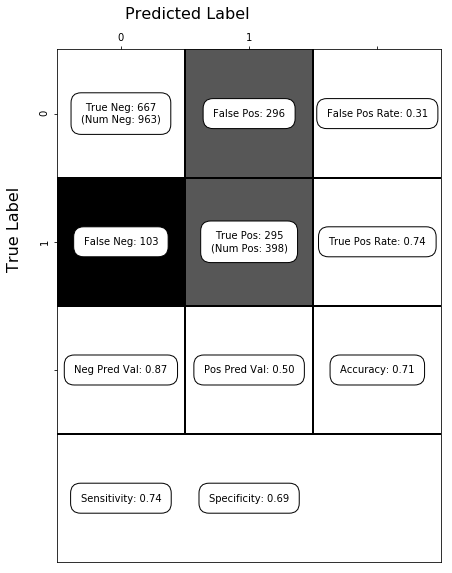

Sensitivity: 0.7412060301507538
Specificity: 0.6926272066458983


In [53]:
#show confusion matrix
import show_confusion_matrix as scm
scm.show_confusion_matrix(conf_mat_tree)

We can see that the model is quite poor at predicting a 1 accurately with only 50% precision

In [51]:
#We can try using a different model such as Gradient Boosted Decision Trees
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse')

In [52]:
%%time
gbdt.fit(X_res, y_res)

Wall time: 277 ms


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [54]:
y_model_pred = gbdt.predict(X_test)
print(gbdt.score(X_test, y_test))

0.7310800881704629


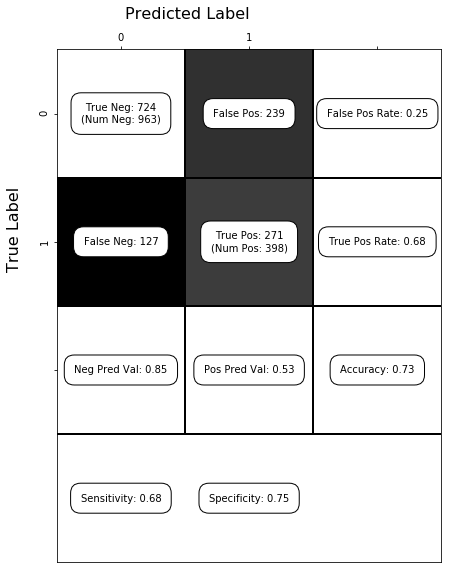

Sensitivity: 0.6809045226130653
Specificity: 0.7518172377985463


In [55]:
#Show Confusion Matrix
conf_mat_tree = cf(y_test, y_model_pred)
scm.show_confusion_matrix(conf_mat_tree)

We have slightly better precision here 

# Recommendations:

1. Using a time invariate version of the class label would help in the sample sizing of our data. (Less imbalance) 
2. Using more features -- consider using the actual vendors as an ordinal feature 
3. Consider using more types of models or even deep learning models
4. Use more data and update the splits to include a back test split (80% train set, 10% test, 10% backtest)